## European Industrial Sites

In [45]:
# Read the CSV file as DataFrame. The separator in this dataset is a semicolon (“;”). Use the first
# column as the index column

In [46]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [47]:
industrial_database = pd.read_csv('https://tubcloud.tu-berlin.de/s/JamLFf2Pjc6KHfp/download/Industrial_Database.csv', sep=';', index_col=0)
industrial_database.dropna(subset=['geom'], inplace=True)

In [48]:
# When you expect the dataset, you will find that the geographic information is given in the “geom” (b)
# column in a format similar to “POINT(x, y)”. This format is called the Well-known text repre￾sentation of geometry (or short: WKT). Such WKT strings can be used to convert the ordinary
# DataFrame into a GeoDataFrame using the function gpd.GeoSeries.from_wkt(). The points
# are given in the coordinate reference system EPSG:4326, which you should also specify when
# constructing the GeoDataFrame. After building the GeoDataFrame, set the column “SiteID” as
# its index.

In [49]:
# Convert the "geom" column to GeoDataFrame
industrial_database_geo = gpd.GeoDataFrame(industrial_database, geometry=gpd.GeoSeries.from_wkt(industrial_database['geom']), crs='EPSG:4326')

# Set "SiteID" as index
industrial_database_geo.set_index('SiteID', inplace=True)

# Print the GeoDataFrame
industrial_database_geo.head()

,CompanyName,SiteName,Address,CityCode,City,Country,geom,Subsector,DataSource,Emissions_ETS_2014,Emissions_EPRTR_2014,Production,Fuel_Demand,Excess_Heat_100-200C,Excess_Heat_200-500C,Excess_Heat_500C,Excess_Heat_Total,geometry
SiteID,,,,,,,,,,,,,,,,,,
1,voestalpine AG,voestalpine Stahl Donawitz GesmbH,Kerpelystrasse 199,8700,Leoben,Austria,POINT(15.067806 47.03378),Iron and steel,ETS/EPRTR,2808536.0,2810000.0,2726675.56,6346.15,192.34,173.66,0.00,366.01,POINT (15.06781 47.03378)
2,voestalpine AG,voestalpine Stahl GmbH,voestalpine-Strasse 3,4020,Linz,Austria,POINT(14.343056 48.281944),Iron and steel,ETS/EPRTR,8698426.0,8660000.0,8444892.86,19732.48,595.71,330.48,40.16,966.36,POINT (14.34306 48.28194)
3,Schmid Industrieholding,Wopfinger Baustoffindustrie,Wopfing 156,2754,Waldegg,Austria,POINT(16.085917 47.87225),Cement,ETS/EPRTR,364798.0,408000.0,477398.78,464.13,0.00,69.62,0.00,69.62,POINT (16.08592 47.87225)
4,OMV Refining and Marketing GmbH,OMV Refining and Marketing GmbH,Mannswörther Strasse 28,2320,Schwechat,Austria,POINT(16.493889 48.144722),Refineries,ETS/EPRTR,2713186.0,2710000.0,NaN,NaN,0.00,0.00,0.00,0.00,POINT (16.49389 48.14472)
5,Zementwerk Hatschek GmbH,Zementwerk Hatschek GmbH,Hatschekstrasse 25,4810,Gmunden,Austria,POINT(13.778 47.92278),Cement,ETS/EPRTR,331127.0,348000.0,607683.04,590.80,0.00,88.62,0.00,88.62,POINT (13.778 47.92278)


In [50]:
# For how many industrial sites is the data on its location missing?

In [51]:
missing_locations = industrial_database_geo['geom'].isna().sum()
print(f"The number of industrial sites with missing location data is {missing_locations}.")

The number of industrial sites with missing location data is 0.


In [52]:
# Visualise the data contained in the GeoDataFrame in a (d) matplotlib plot such that the following
# criteria are fulfilled:
# • figure size 10 by 10 inches
# • axis projection is Plate Carree projection
# • circles are coloured by the industry sector
# • a legend indicates which colour corresponds to which industry sector
# • circle size is proportional to ETS emissions and appropriately sized (a legend is not necessary)
# • coastlines are shown in black and country borders in grey

C:\Users\Shahzaib Khan\miniconda3\envs\energy\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


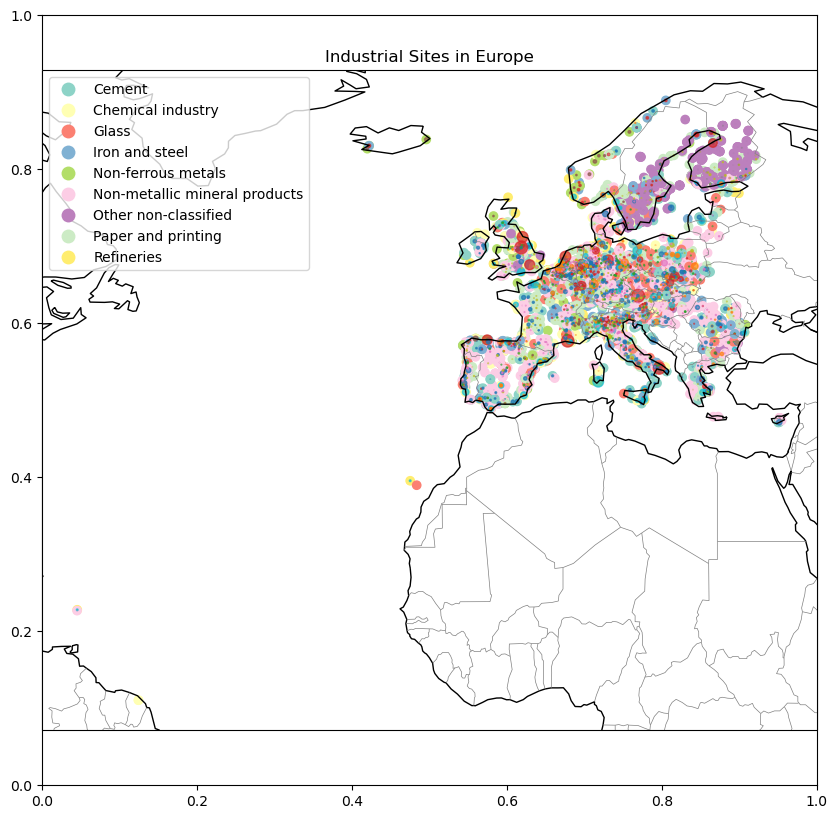

In [57]:
import cartopy

fig, ax = plt.subplots(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
industrial_database_geo.plot(column='Subsector', cmap='Set3', legend=True, legend_kwds={'loc': 'upper left'}, ax=ax)
industrial_database_geo.plot(ax=ax, column='Subsector', markersize=industrial_database_geo['Emissions_ETS_2014'].div(100000), alpha=0.7)
ax.set_title('Industrial Sites in Europe')
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)
plt.show()

In [58]:
# Create a (e) matplotlib bar chart outlining the ETS emissions per industry sector in units of MtCO2/year.
# Make sure to label the axes appropriately

Text(0.5, 1.0, 'ETS Emissions by Industry Sector in Europe')

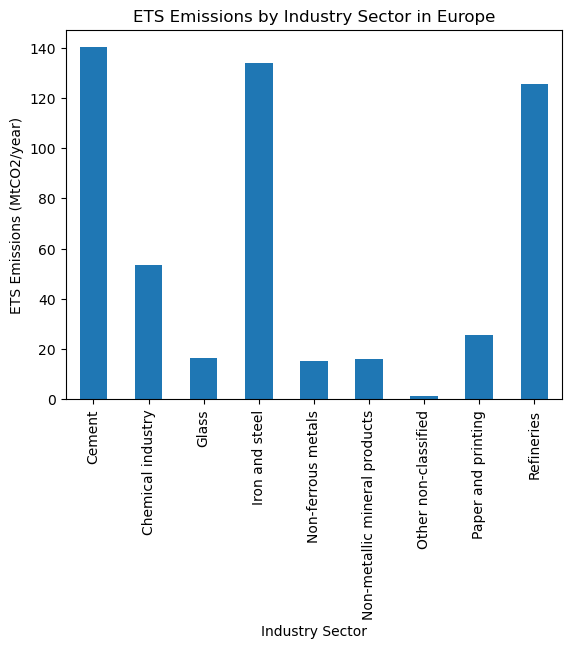

In [59]:
emissions_by_sector = industrial_database_geo.groupby('Subsector')['Emissions_ETS_2014'].sum() / 1e6  # Convert to MtCO2/year
emissions_by_sector.plot(kind='bar')
plt.xlabel('Industry Sector')
plt.ylabel('ETS Emissions (MtCO2/year)')
plt.title('ETS Emissions by Industry Sector in Europe')

In [60]:
# Identify the industry sector with the highest ETS emissions. What’s the share in percent of this (f )
# sector relative to the total emissions accounted for?

In [61]:
highest_emissions_sector = emissions_by_sector.idxmax()
highest_emissions_share = (emissions_by_sector[highest_emissions_sector] / emissions_by_sector.sum()) * 100
print(f"The industry sector with the highest ETS emissions is {highest_emissions_sector}, "
      f"which accounts for {highest_emissions_share:.2f}% of the total emissions.")

The industry sector with the highest ETS emissions is Cement, which accounts for 26.51% of the total emissions.


In [62]:
# For each country, identify the sector with the highest level of ETS emissions

In [63]:
emissions_by_country_sector = industrial_database_geo.groupby(['Country', 'Subsector'])['Emissions_ETS_2014'].sum() / 1e6  # Convert to MtCO2/year
idx = emissions_by_country_sector.groupby(level='Country').idxmax()
emissions_by_country_sector.loc[idx].round(3)

Country         Subsector         
Austria         Iron and steel        11.894
Belgium         Cement                 6.595
Bulgaria        Cement                 1.737
Cyprus          Cement                 1.507
Czech Republic  Cement                 3.076
Denmark         Cement                 1.718
Estonia         Paper and printing     0.055
Finland         Iron and steel         4.526
France          Cement                13.677
Germany         Iron and steel        36.131
Greece          Refineries             5.653
Hungary         Refineries             1.397
Iceland         Non-ferrous metals     1.385
Ireland         Cement                 2.220
Italy           Refineries            19.303
Latvia          Cement                 0.805
Liechtenstein   Cement                 2.073
Lithuania       Refineries             1.631
Luxembourg      Cement                 0.586
Netherlands     Refineries            10.808
Norway          Non-ferrous metals     2.615
Poland          Ceme

In [64]:
# List the 20 German companies responsible for the most ETS emissions and their respective emis- (h)
# sions in MtCO2/year in descending order.

In [65]:
# Filter by Germany
industrial_database_germany = industrial_database[industrial_database['Country'] == 'Germany']

# Group by company and sum emissions
df_germany_summed = industrial_database_germany.groupby('CompanyName')['Emissions_ETS_2014'].sum()

# Sort by emissions in descending order and take top 20
top20 = df_germany_summed.sort_values(ascending=False)[:20]

# Print results
for i, (company, emissions) in enumerate(top20.items(), 1):
    print(f"{i}. {company}: {emissions} MtCO2/year")

1. ThyssenKrupp Steel Europe AG: 8393773.0 MtCO2/year
2. Hüttenwerke Krupp Mannesmann GmbH: 4666233.0 MtCO2/year
3. RUHR OEL GmbH: 4568524.0 MtCO2/year
4. Salzgitter Flachstahl GmbH Abt. Umweltschutz / 08 TUI: 4465254.0 MtCO2/year
5. ROGESA Roheisengesellschaft Saar mbH: 4223992.0 MtCO2/year
6. BASF: 3974214.0 MtCO2/year
7. HeidelbergCement AG: 3799311.0 MtCO2/year
8. PCK Raffinerie GmbH Schwedt: 3714705.0 MtCO2/year
9. Rheinkalk GmbH: 2945368.0 MtCO2/year
10. Werk 1 MIRO-Mineralölraffinerie Oberrhein GmbH & Co.KG: 2782816.0 MtCO2/year
11. ArcelorMittal Bremen GmbH: 2757458.0 MtCO2/year
12. SKW Stickstoffwerke Piesteritz GmbH: 2394804.0 MtCO2/year
13. Schwenk Zement KG: 2295420.0 MtCO2/year
14. INEOS Manufacturing Deutschland GmbH: 2202742.0 MtCO2/year
15. Pruna Betreiber GmbH vertreten durch die KBS GmbH: 2070677.0 MtCO2/year
16. Shell Deutschland Oil GmbH Rheinland Raffinerie, Werk Süd: 1975074.0 MtCO2/year
17. TOTAL Raffinerie Mitteldeutschland GmbH: 1873500.0 MtCO2/year
18. BAYERNO

In [66]:
# Plot a (i) choropleth map of NUTS-2 regions with matplotlib which shows each region’s industry
# ETS emissions per area (in tCO2/year/km2
# ). Limit the colorbar to 1 kt/year/km2 by passing the
# keyword argument vmax=1000 to the geopandas plotting function. Focus the view on continental
# Europe by setting the appropriate bounds of the figure. Add a colorbar to the right-hand side of
# the plot.

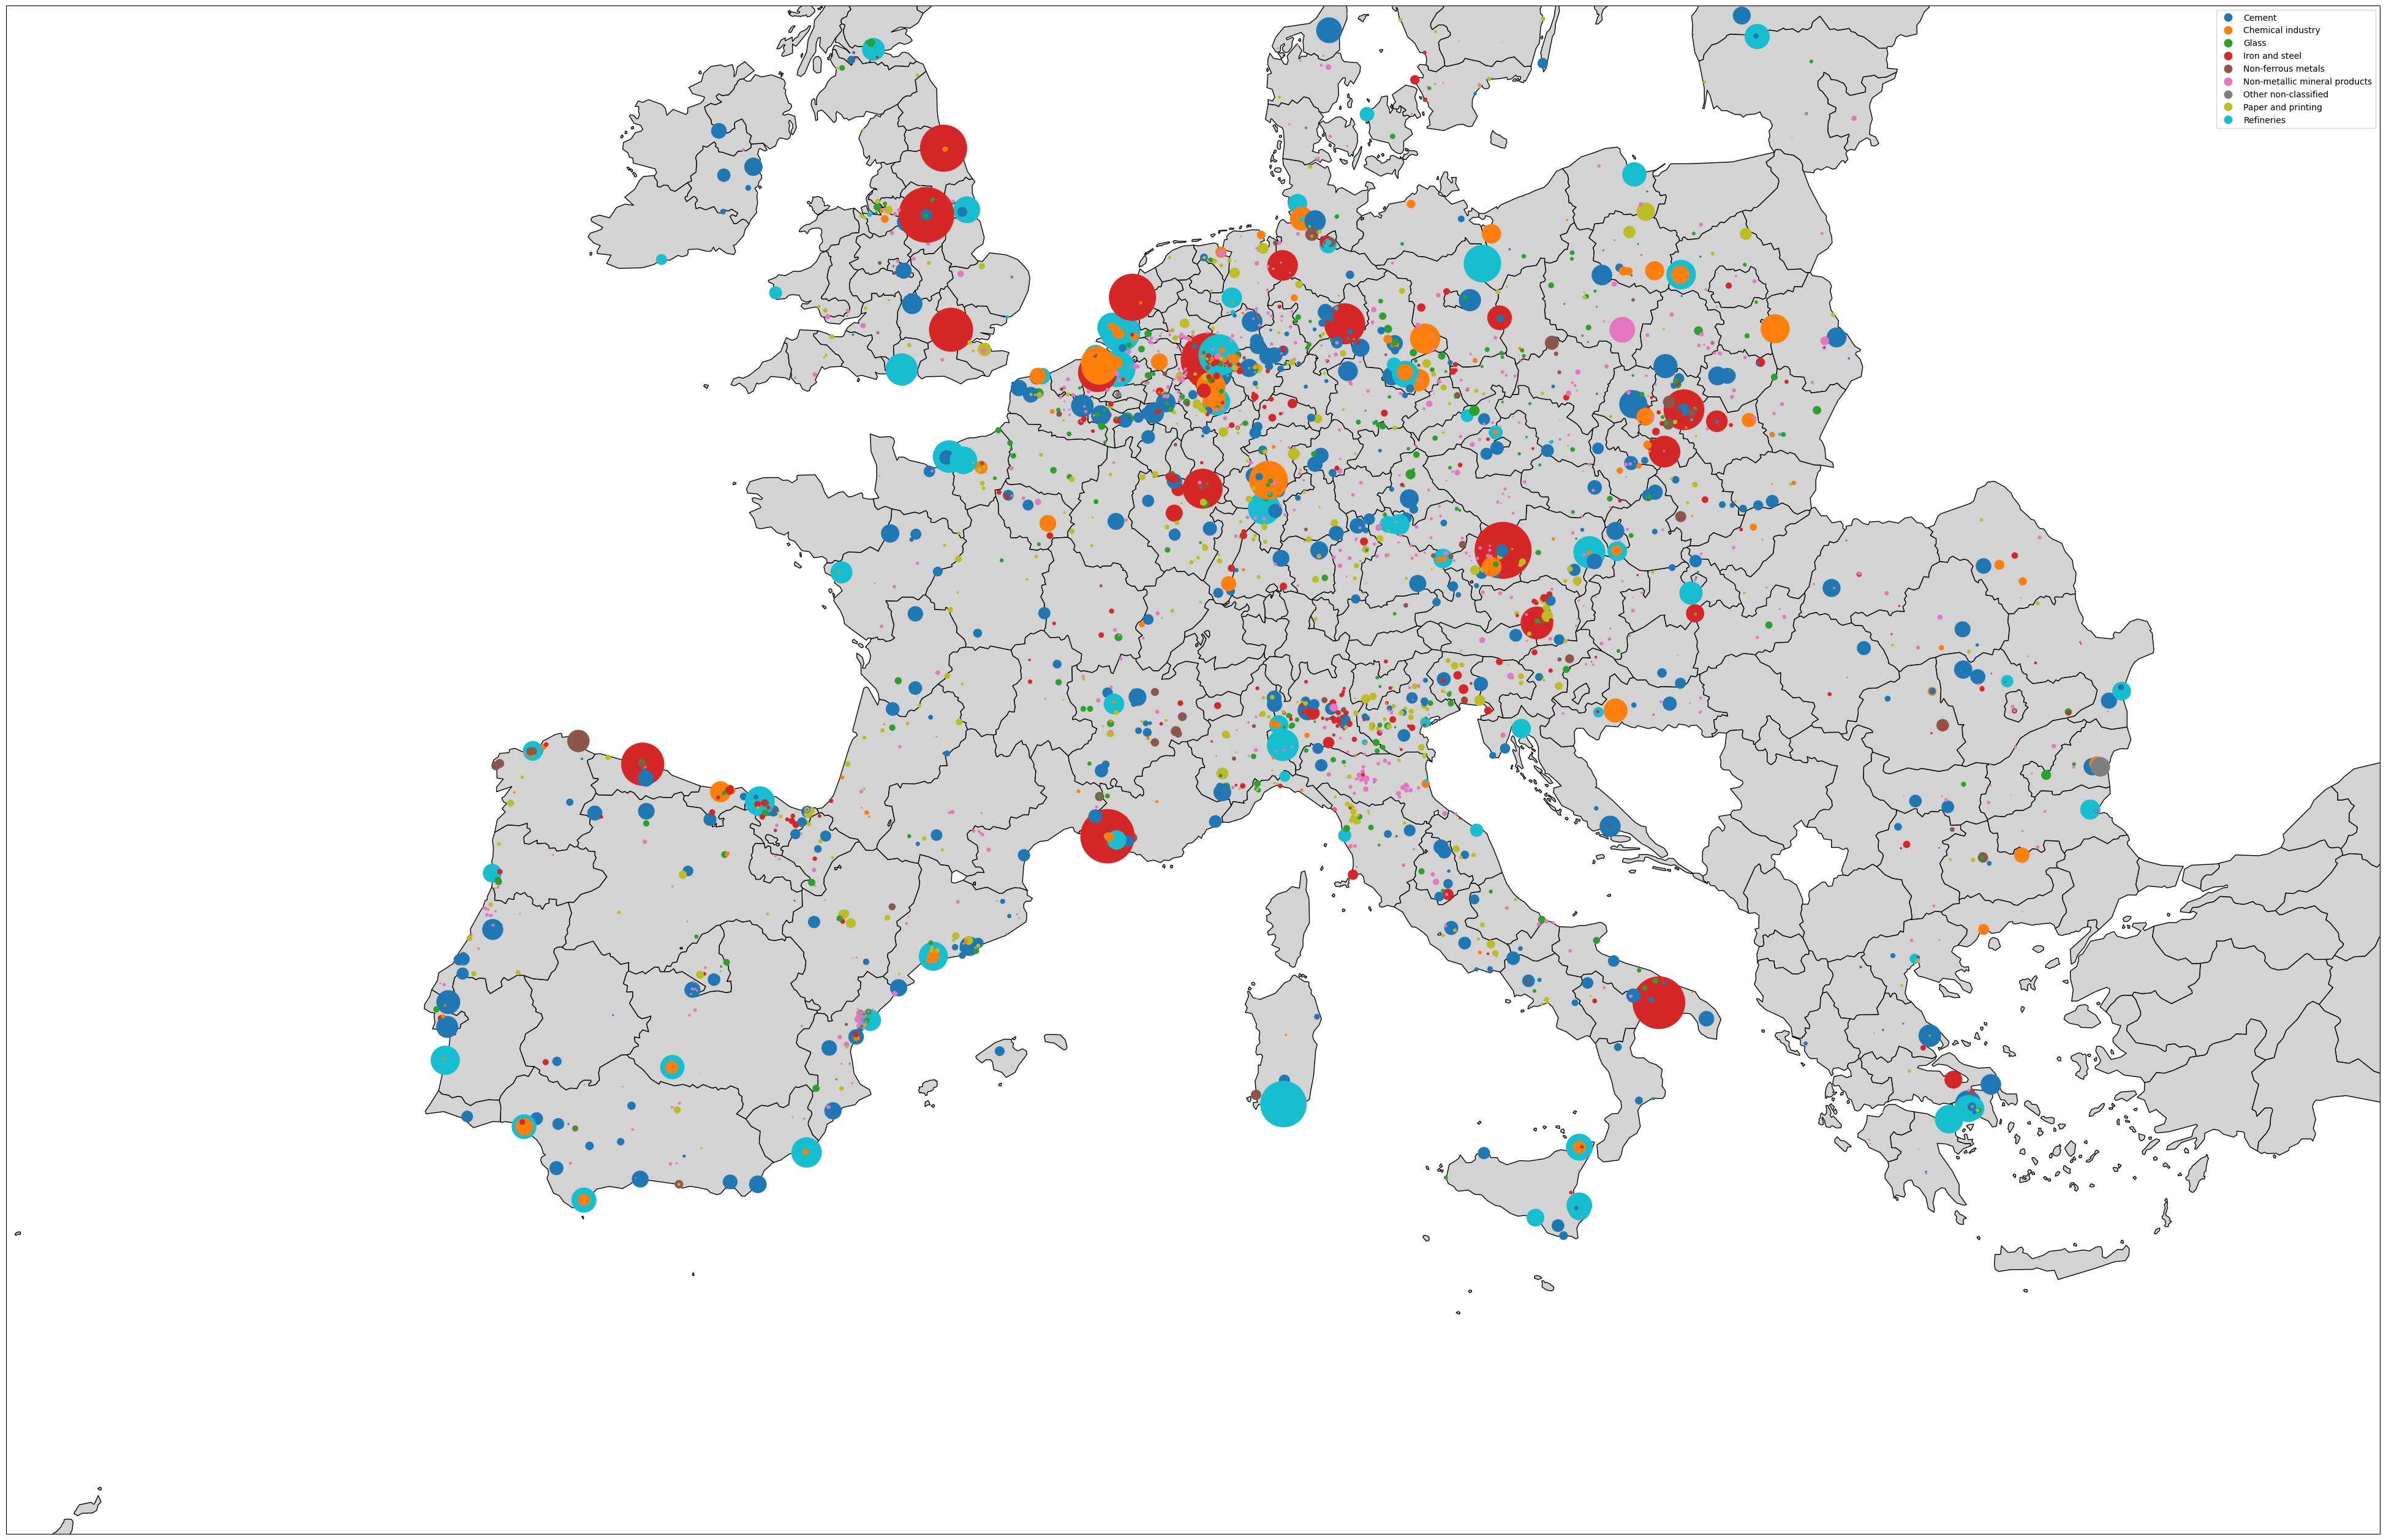

In [67]:
# Load the industrial database and NUTS-2 regions data
industrial_database = pd.read_csv("https://tubcloud.tu-berlin.de/s/JamLFf2Pjc6KHfp/download/Industrial_Database.csv", sep=';', index_col=0)
industrial_database.dropna(subset=['geom'], inplace=True)
nuts_regions = gpd.read_file("https://tubcloud.tu-berlin.de/s/5WJ6pGsBKR7a3sp/download/NUTS_RG_10M_2021_4326.geojson")
nuts2 = nuts_regions.query("LEVL_CODE == 2")

nuts2 = nuts2.to_crs(3035)

industrial_database_geo = gpd.GeoDataFrame(industrial_database, geometry=gpd.GeoSeries.from_wkt(industrial_database['geom']), crs='EPSG:4326')
industrial_database_geo.set_index('SiteID', inplace=True)


industrial_database_geo = industrial_database_geo.to_crs(3035)

fig = plt.figure(figsize=(50,50))

ax = plt.axes(projection=ccrs.epsg(3035))

nuts2.plot(
    ax=ax,
    edgecolor='black',
    facecolor='lightgrey'
)

industrial_database_geo.to_crs(3035).plot(
    ax=ax,
    column='Subsector',
    markersize=industrial_database_geo.Emissions_ETS_2014/2000,
    legend=True
)

ax.set_extent([-15, 30, 10, 55])

In [68]:
# Which NUTS-3 region has the highest level of industry ETS emissions? In addition to the “NUTS_ID”, (j)
# also provide the common name of the region. Which companies are settled there and which sec￾tors do they belong to?

In [69]:
# Load NUTS-3 region
nuts3 = nuts_regions.query("LEVL_CODE == 3")
nuts3


nuts3 = nuts3.to_crs(3035)

industrial_database_geo = gpd.GeoDataFrame(industrial_database, geometry=gpd.GeoSeries.from_wkt(industrial_database['geom']), crs='EPSG:4326')
industrial_database_geo.set_index('SiteID', inplace=True)

#merge NUTS-3 and dataframe
industrial_database_geo = industrial_database_geo.to_crs(3035)
joined1 = industrial_database_geo.sjoin(nuts3)
joined1

,CompanyName,SiteName,Address,CityCode,City,Country,geom,Subsector,DataSource,Emissions_ETS_2014,...,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID
SiteID,,,,,,,,,,,,,,,,,,,,,
1,voestalpine AG,voestalpine Stahl Donawitz GesmbH,Kerpelystrasse 199,8700,Leoben,Austria,POINT(15.067806 47.03378),Iron and steel,ETS/EPRTR,2808536.0,...,AT225,AT225,3,AT,West- und Südsteiermark,West- und Südsteiermark,3.0,3,3,AT225
2,voestalpine AG,voestalpine Stahl GmbH,voestalpine-Strasse 3,4020,Linz,Austria,POINT(14.343056 48.281944),Iron and steel,ETS/EPRTR,8698426.0,...,AT312,AT312,3,AT,Linz-Wels,Linz-Wels,4.0,2,3,AT312
3,Schmid Industrieholding,Wopfinger Baustoffindustrie,Wopfing 156,2754,Waldegg,Austria,POINT(16.085917 47.87225),Cement,ETS/EPRTR,364798.0,...,AT122,AT122,3,AT,Niederösterreich-Süd,Niederösterreich-Süd,3.0,2,3,AT122
4,OMV Refining and Marketing GmbH,OMV Refining and Marketing GmbH,Mannswörther Strasse 28,2320,Schwechat,Austria,POINT(16.493889 48.144722),Refineries,ETS/EPRTR,2713186.0,...,AT127,AT127,3,AT,Wiener Umland/Südteil,Wiener Umland/Südteil,4.0,2,3,AT127
5,Zementwerk Hatschek GmbH,Zementwerk Hatschek GmbH,Hatschekstrasse 25,4810,Gmunden,Austria,POINT(13.778 47.92278),Cement,ETS/EPRTR,331127.0,...,AT315,AT315,3,AT,Traunviertel,Traunviertel,3.0,3,3,AT315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,"Pezinské tehelne - Paneláreň, a.s.",Výr. keram. výrobkov vypaľovaním - Pezin. tehelňa,Tehelná 9,90201,Pezinok,Slovakia,POINT(17.276015 48.284646),Non-metallic mineral products,ETS,4359.0,...,SK010,SK010,3,SK,Bratislavský kraj,Bratislavský kraj,4.0,1,3,SK010
5025,"SLOVNAFT, a.s.",Petrochémia SPC,Vlčie hrdlo 1,82412,Bratislava,Slovakia,POINT(17.17326 48.129706),Chemical industry,ETS,250126.0,...,SK010,SK010,3,SK,Bratislavský kraj,Bratislavský kraj,4.0,1,3,SK010
5027,IPEĽSKÉ TEHELNE a.s.,"IPEĽSKÉ TEHELNE a.s., závod Lučenec",závod Lučenec - časť Fabianka,98401,Lučenec,Slovakia,POINT(19.660555 48.326908),Non-metallic mineral products,ETS,NaN,...,SK032,SK032,3,SK,Banskobystrický kraj,Banskobystrický kraj,3.0,3,3,SK032


In [70]:
nuts3_emissions = joined1.groupby(["NUTS_ID", "NAME_LATN"]).sum()["INDUSTRY_EMISSIONS"].reset_index()


highest_emissions_region = nuts3_emissions.sort_values("INDUSTRY_EMISSIONS", ascending=False).iloc[0]

print("Region with highest level of industry ETS emissions:")
print("NUTS ID: ", highest_emissions_region["NUTS_ID"])
print("Name: ", highest_emissions_region["NAME_LATN"])

highest_emissions_data = nuts3_data[nuts3_data["NUTS_ID"] == highest_emissions_region["NUTS_ID"]]

company_sectors = highest_emissions_data.groupby(["COMPANY_NAME", "SECTOR_NAME"]).sum()["INDUSTRY_EMISSIONS"].reset_index()

print("\nCompanies settled in the region with highest level of industry ETS emissions:")
print(company_sectors)


TypeError: agg function failed [how->sum,dtype->geometry]

## Global Hydro-PowerPlants

In [71]:
# Read the provided CSV file with (a) pandas and convert it into a geopandas.GeoDataFrame.

In [72]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [73]:
fn = "https://tubcloud.tu-berlin.de/s/aZZfWGd8rmbEx39/download/global_power_plant_database.csv"
global_power_plant_database = pd.read_csv(fn, low_memory=False, index_col=0)
global_power_plant_database

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
country,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [74]:
# Reduce the dataset such that it only includes hydropower plants

In [75]:
hydro_power_plant = global_power_plant_database.loc[global_power_plant_database['primary_fuel'] == 'Hydro']
hydro_power_plant

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
country,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,...,58.77,54.42,42.71,59.72,46.12,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,GEODB0040537,6.00,35.9416,68.7100,Hydro,NaN,NaN,NaN,...,21.99,21.19,18.40,25.34,19.74,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZMB,Zambia,Kafue Gorge,WRI1000022,990.00,-15.8089,28.4199,Hydro,NaN,NaN,NaN,...,4042.48,4042.48,4167.26,4003.94,3909.20,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
ZMB,Zambia,Kariba,WRI1000021,930.00,-16.5222,28.7619,Hydro,NaN,NaN,NaN,...,4959.70,4959.70,4643.83,4878.43,4910.70,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
ZMB,Zambia,Lusiwasi,WRI1000023,12.00,-12.9884,30.8649,Hydro,NaN,NaN,NaN,...,26.48,26.48,26.48,26.55,26.48,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [76]:
# Identify the oldest hydropower plant in the dataset by its name

In [77]:
hydro_power_plant[hydro_power_plant['commissioning_year'] == hydro_power_plant['commissioning_year'].min()]

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
country,,,,,,,,,,,,,,,,,,,,,
USA,United States of America,Granite,USA0003651,2.0,40.6192,-111.7821,Hydro,NaN,NaN,NaN,...,5.91,6.41,5.98,6.43,5.85,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [78]:
# Determine the percentage share of hydropower plants with capacities below 10 MW and below (d)
# 100 MW by the number of hydropower plants.

In [79]:
hydro_capacity_by_country = hydro_power_plant.groupby('country_long')['capacity_mw'].sum()

largest_hydro_countries = hydro_capacity_by_country.nlargest(3)
print(f"The three countries with the largest total hydropower capacities are:\n{largest_hydro_countries}")

hydro_below_10mw = hydro_power_plant[hydro_power_plant['capacity_mw'] < 10]
hydro_below_100mw = hydro_power_plant[hydro_power_plant['capacity_mw'] < 100]
total_hydro_plants = len(hydro_power_plant)
percentage_below_10mw = len(hydro_below_10mw) / total_hydro_plants * 100
percentage_below_100mw = len(hydro_below_100mw) / total_hydro_plants * 100
print(f"The percentage share of hydropower plants with capacities below 10 MW is {percentage_below_10mw:.2f}%")
print(f"The percentage share of hydropower plants with capacities below 100 MW is {percentage_below_100mw:.2f}%")

The three countries with the largest total hydropower capacities are:
country_long
China                       259025.6000
United States of America    101656.9000
Brazil                       98039.3839
Name: capacity_mw, dtype: float64
The percentage share of hydropower plants with capacities below 10 MW is 35.27%
The percentage share of hydropower plants with capacities below 100 MW is 75.60%


In [80]:
# Identify the three countries with the largest total hydropower capacities and list their summed (e)
# capacities in units of GW.

In [81]:
grouped = hydro_power_plant.groupby('country_long')['capacity_mw'].sum().sort_values(ascending=False)

top_countries = grouped.head(3)

for country, capacity in top_countries.items():
    print(f"{country}: {capacity / 1000:.2f} GW")

China: 259.03 GW
United States of America: 101.66 GW
Brazil: 98.04 GW


In [82]:
# Identify the five hydropower plants with the highest capacity factor based on the estimated (f ) gen￾eration in 2017. 
# List their country, name, commissioning year, capacity and estimated generation in 2017.

In [83]:
hydropower_plants_1 = hydro_power_plant[(hydro_power_plant['primary_fuel'] == 'Hydro') & (hydro_power_plant['generation_gwh_2017'].notna())]

hydropower_plants_1['capacity_factor'] = hydropower_plants_1['generation_gwh_2017'] / (hydropower_plants_1['capacity_mw'] * 8760)

top_five_plants = hydropower_plants_1.sort_values('capacity_factor', ascending=False).head(5)
print("Top five hydropower plants by capacity factor:")
print(top_five_plants[['name', 'commissioning_year', 'capacity_mw', 'generation_gwh_2017']])

Top five hydropower plants by capacity factor:
                             name  commissioning_year  capacity_mw  \
country                                                              
USA                Nooksack Hydro              1906.0          1.5   
USA            Hailesboro 4 Plant              1922.0          1.4   
USA                       Faraday              1958.0         19.2   
USA                Superior Falls              1917.0          1.4   
USA      Menominee Mill Marinette              1954.0          1.8   

         generation_gwh_2017  
country                       
USA                   21.012  
USA                   13.203  
USA                  174.129  
USA                   12.600  
USA                   16.181  


C:\Users\Shahzaib Khan\AppData\Local\Temp\ipykernel_4972\3499945037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hydropower_plants_1['capacity_factor'] = hydropower_plants_1['generation_gwh_2017'] / (hydropower_plants_1['capacity_mw'] * 8760)


In [84]:
# Create a global map with all hydropower plants. The marker size should be proportional to the (g)
# nominal capacity (appropriately scaled) and coloured according to the estimated 2017 capacity
# factor. Add coastlines and country borders for orientation. Include labels for the colouring and
# marker sizes.

In [85]:
geometry = gpd.points_from_xy(hydro_power_plant['longitude'], hydro_power_plant['latitude'])
gdf = gpd.GeoDataFrame(hydro_power_plant, geometry=geometry, crs=4326)
gdf

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry
country,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,...,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (65.119 32.322)
AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,...,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (69.4787 34.556)
AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,...,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (69.717 34.641)
AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,...,54.42,42.71,59.72,46.12,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (70.3633 34.4847)
AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,GEODB0040537,6.00,35.9416,68.7100,Hydro,NaN,NaN,NaN,...,21.19,18.40,25.34,19.74,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (68.71 35.9416)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZMB,Zambia,Kafue Gorge,WRI1000022,990.00,-15.8089,28.4199,Hydro,NaN,NaN,NaN,...,4042.48,4167.26,4003.94,3909.20,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (28.4199 -15.8089)
ZMB,Zambia,Kariba,WRI1000021,930.00,-16.5222,28.7619,Hydro,NaN,NaN,NaN,...,4959.70,4643.83,4878.43,4910.70,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (28.7619 -16.5222)
ZMB,Zambia,Lusiwasi,WRI1000023,12.00,-12.9884,30.8649,Hydro,NaN,NaN,NaN,...,26.48,26.48,26.55,26.48,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (30.8649 -12.9884)


C:\Users\Shahzaib Khan\miniconda3\envs\energy\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


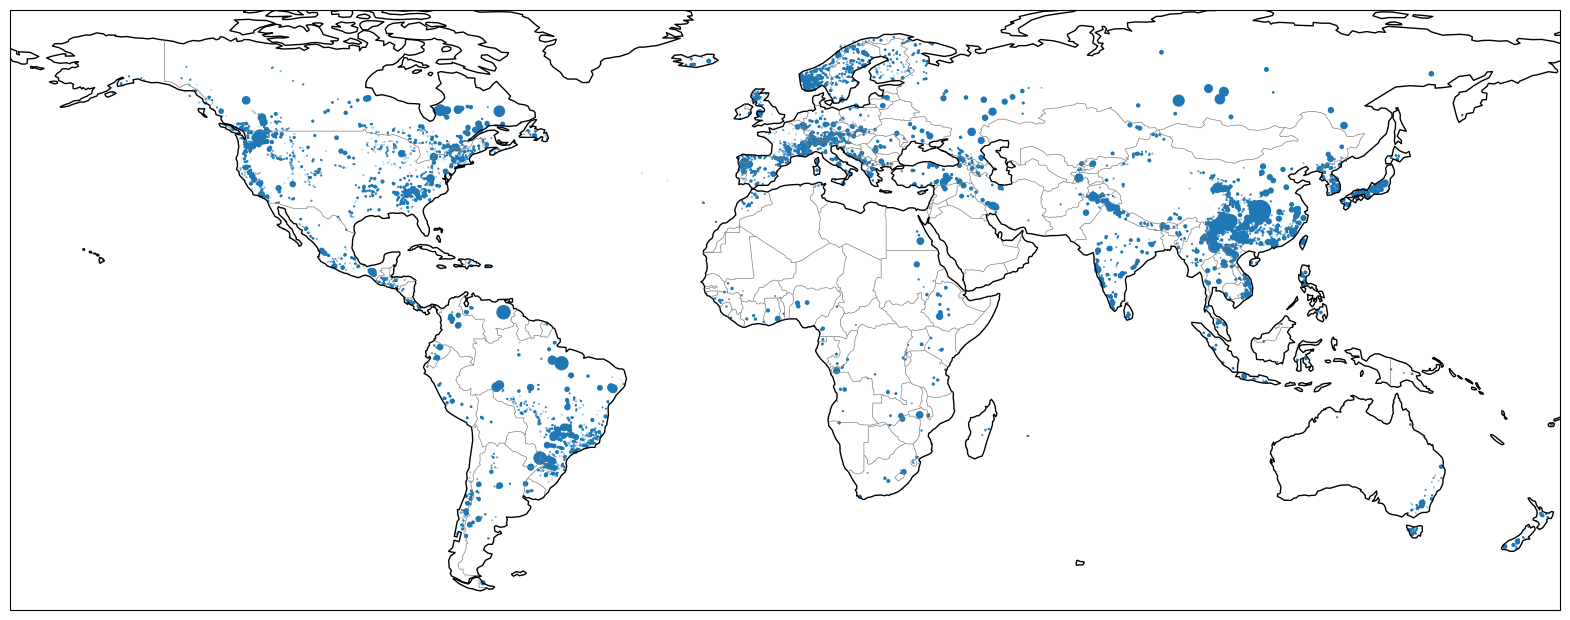

In [86]:
fig = plt.figure(figsize=(20,20))

ax = plt.axes(projection=ccrs.PlateCarree())

gdf.plot(
    ax=ax,
    column='primary_fuel',
    markersize=gdf.capacity_mw/1e2,
)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)

In [87]:
# Remove all hydropower plants with a missing commissioning year from the dataset. Compute (h)
# the capacity-weighted mean age of all remaining hydropower plants.

In [88]:
hydropower_plants_1 = hydro_power_plant[(hydro_power_plant['primary_fuel'] == 'Hydro') & (hydro_power_plant['generation_gwh_2017'].notna())]

hydropower_plants_1['capacity_factor'] = hydropower_plants_1['generation_gwh_2017'] / (hydropower_plants_1['capacity_mw'] * 8760)

top_five_plants = hydropower_plants_1.sort_values('capacity_factor', ascending=False).head(5)
print("Top five hydropower plants by capacity factor:")
print(top_five_plants[['name', 'commissioning_year', 'capacity_mw', 'generation_gwh_2017']])

Top five hydropower plants by capacity factor:
                             name  commissioning_year  capacity_mw  \
country                                                              
USA                Nooksack Hydro              1906.0          1.5   
USA            Hailesboro 4 Plant              1922.0          1.4   
USA                       Faraday              1958.0         19.2   
USA                Superior Falls              1917.0          1.4   
USA      Menominee Mill Marinette              1954.0          1.8   

         generation_gwh_2017  
country                       
USA                   21.012  
USA                   13.203  
USA                  174.129  
USA                   12.600  
USA                   16.181  


C:\Users\Shahzaib Khan\AppData\Local\Temp\ipykernel_4972\3499945037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hydropower_plants_1['capacity_factor'] = hydropower_plants_1['generation_gwh_2017'] / (hydropower_plants_1['capacity_mw'] * 8760)


In [89]:
# For each country, compute the average age of its hydropower plants weighted by the plants’ (i)
# average estimated generation between 2014 and 2017. Hint: You can iterate over GroupBy objects
# with a loop. Which five countries have the oldest and newest fleet of hydropower plants?

In [90]:
weighted_age = []
for country, group in gdf[gdf['commissioning_year'].notnull()].groupby('country_long'):
    weighted_age.append((country, (group['commissioning_year'] * (group['estimated_generation_gwh_2014'] + group['estimated_generation_gwh_2015'] + group['estimated_generation_gwh_2016'] + group['estimated_generation_gwh_2017']) / (group['estimated_generation_gwh_2014'] + group['estimated_generation_gwh_2015'] + group['estimated_generation_gwh_2016'] + group['estimated_generation_gwh_2017'])).mean()))
    
weighted_age_df = pd.DataFrame(weighted_age, columns=['country', 'weighted_age'])
oldest_countries = weighted_age_df.sort_values('weighted_age', ascending=False).head()['country']
newest_countries = weighted_age_df.sort_values('weighted_age', ascending=True).head()['country']

print("Countries with the oldest fleet of hydropower plants:")
print(oldest_countries.tolist())
print("\nCountries with the newest fleet of hydropower plants:")
print(newest_countries.tolist())

Countries with the oldest fleet of hydropower plants:
['Philippines', 'Venezuela', 'Ecuador', 'Cambodia', 'Pakistan']

Countries with the newest fleet of hydropower plants:
['Switzerland', 'Jamaica', 'Algeria', 'France', 'Germany']
